## Analyses of the Frequency_Taxonomy for female emigration

### Loading the necessary libraries

In [1]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections

### Functions

In [2]:
def freq_count(results):
    freq_count={}
    for year in results:
        for i in results[year]:
            if year not in freq_count:
                freq_count[year][i[0]]= i[1]
            else:    
                freq_count[year]+=i['count']
    return freq_count

In [3]:
def normalize_freq(publications, freq_count):
    normed_results = {}
    for year in freq_count:
        if year>0:
            normed_results[year] = freq_count[year]/float(publication[year][2])
    return normed_results

In [4]:
def read_query_results(filename):
    with open('./results_bl_tda/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [5]:
def plot_freq_count(freq_count):
    plt.plot(freq_count.keys(), freq_count.values())
    plt.show()

## 1. Frequencies (without normalised them! ) results using different preprocessing treatments

### 1.a ) Preprocessing: Normalized + Stemmed
Frequency of the query results, in which each word has been normalized (lower-case and removing all characters that are not 'a',...,'z') and stemmed (reducing words to their word stem).

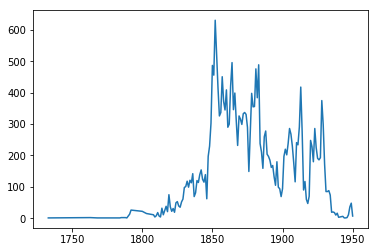

In [6]:
query_results_st=read_query_results('results_taxonomy_stemming')
freq_count_st=freq_count(query_results_st)
plot_freq_count(freq_count_st)

#### 1.b) Example of a normalized + stemmed query results for  1800

In [53]:
tdf_st = pd.DataFrame.from_dict(query_results_st[1800])
tdf_st

,count,target_word,words
0,1,emigr,"[engag, train]"
1,1,emigr,"[failur, maid]"
2,1,emigr,[coloni]
3,1,emigr,"[failur, guardian, servic]"
4,1,emigr,"[daughter, maid]"
5,1,emigr,"[daughter, marriag]"
6,1,emigr,[loan]
7,1,emigr,[servic]
8,2,emigr,[daughter]
9,1,emigr,"[empir, engag]"


### 2.a) Preprocessing: Normalized + Lemmatized
Plot the frequency of the query results, in which each word has been normalized (lower-case and removing all
characters that are not 'a',...,'z') and lemmatized (reducing words to their correct base form).

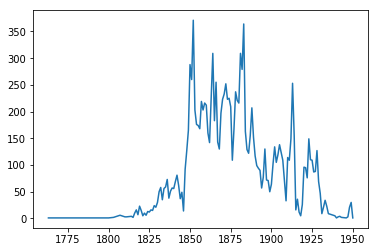

In [63]:
query_results_lem=read_query_results('results_taxonomy_lem')
freq_count_lem=freq_count(query_results_lem)
plot_freq_count(freq_count_lem)

#### 2.b) Example of a normalized + lemmatized query result for 1800

In [50]:
# Example of the normalized + lemmatized query results for 1800
tdf_lem = pd.DataFrame.from_dict(query_results_lem[1800])
tdf_lem

,count,target_word,words
0,1,emigration,[colony]


### 3.a) Preprocessing: Normalized 

Plot the frequency of the query results, in which each word has been normalized (lower-case and removing all
characters that are not 'a',...,'z').

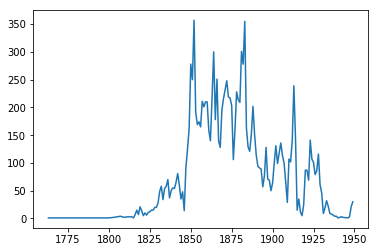

In [62]:
query_results_norm=read_query_results('results_taxonomy_norm')
freq_count_norm=freq_count(query_results_norm)
plot_freq_count(freq_count_norm)

#### 3.b) Example of a normalized query result for  1800

In [65]:
tdf_norm = pd.DataFrame.from_dict(query_results_norm[1800])
tdf_norm

,count,target_word,words
0,1,emigration,[colony]


## 2. Normalised frequencies results using different preprocessing treatments

Here, we are examining the total number of isses, articles and words published over the period to see how much our search terms are affected by the way that the number of issues (and articles, and words!) published increases over the measurement period.

In [32]:
norm_publication=read_query_results('results_normalized')

We count the total number of words per year, and then count total instances of that search phrase per year, and plot normalised frequency on a graph (x axis is years), to see whether it is a thing that is becoming more or less popular with time

### 2.a) Plot of  normalized frequencies in which each word has been preprocessed using: normalization + stemming

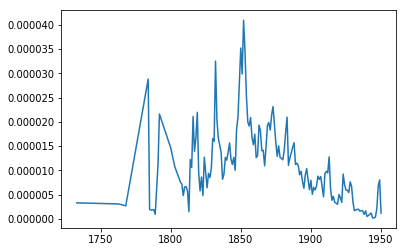

In [61]:
normed_results_st=normalize_freq(norm_publication, freq_count_st)
plot_freq_count(normed_results_st)

### 2.b) Plot of normalized frequencies in which each word has been preprocessed using: normalization + lemmatization

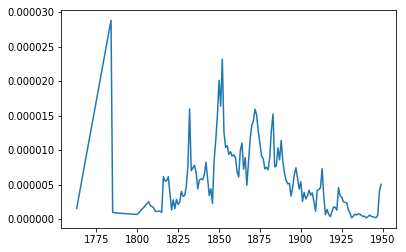

In [60]:
normed_results_lem=normalize_freq(norm_publication, freq_count_lem)
plot_freq_count(normed_results_lem)

### 2.c) Plot of normalized frequencies in which each word has been preprocessed using: normalization 

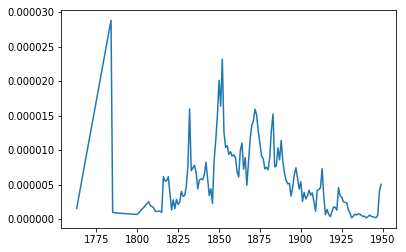

In [59]:
normed_results_norm=normalize_freq(norm_publication, freq_count_norm)
plot_freq_count(normed_results_norm)